# $f/I$ curve parameters extracted from slice recordings

Shown in fig. 1.

In [1]:
from common import colors, pvalue_thresholds, fliersize, savefig

In [2]:
import os
os.chdir(os.path.join('..', '..'))
print(os.getcwd())

/home/eharkin/projects/5HTGIF-stable/src


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from ezephys import pltools
from statannot import add_stat_annotation

from grr.Tools import stripNan

In [4]:
IMG_PATH = None
NOTEBOOK_PATH = os.path.join('figs', 'scripts')

plt.style.use(os.path.join(NOTEBOOK_PATH, 'publication_figure_style.dms'))

# Load $f/I$ parameters

In [5]:
data = {
    celltype: pd.read_csv(os.path.join('data', 'processed', celltype, 'current_steps_gain.csv'))
    for celltype in ['5HT', 'GABA']
}
for celltype in data:
    data[celltype]['cell_type'] = celltype
param_df = pd.concat([data[celltype] for celltype in data], axis=0)
param_df.reset_index(drop=True, inplace=True)

param_df

,freq_at_50,freq_at_rheobase,gain,is_monotonic,rheobase,spearman_p,spearman_rho,cell_type
0,4.039271,1.0,0.074977,True,8.766868,5.203924e-04,0.939827,5HT
1,0.540422,1.0,0.037190,True,54.663452,7.062569e-08,0.975217,5HT
2,0.010133,1.0,0.085683,True,60.045643,4.256164e-06,0.988024,5HT
3,0.000000,1.0,0.042441,True,64.524641,7.882961e-06,0.962950,5HT
4,4.242575,1.0,0.106712,True,16.735346,1.330989e-11,0.990100,5HT
5,0.029795,1.0,0.039304,True,59.471666,2.399471e-07,0.977008,5HT
6,2.000000,2.0,0.044860,True,44.279461,4.179468e-02,0.828079,5HT
7,5.000000,2.0,0.051668,True,8.477907,6.715554e-12,0.991170,5HT
8,1.826810,2.0,0.052506,True,50.878105,2.183923e-09,0.987686,5HT
9,2.884087,1.0,0.030544,True,30.874911,5.537728e-06,0.953463,5HT


In [6]:
param_df['gain'] *= 1e3  # Convert to Hz/nA from Hz/pA

## Summary statistics

In [7]:
param_df.groupby('cell_type').mean()

,freq_at_50,freq_at_rheobase,gain,is_monotonic,rheobase,spearman_p,spearman_rho
cell_type,,,,,,,
5HT,2.809460,1.647059,52.244907,1.0,33.793841,0.003074,0.962146
GABA,8.162006,3.285714,82.470465,0.5,11.318860,0.014457,0.585090


In [8]:
param_df.groupby('cell_type').std()

,freq_at_50,freq_at_rheobase,gain,is_monotonic,rheobase,spearman_p,spearman_rho
cell_type,,,,,,,
5HT,2.216851,0.996317,22.186426,0.000000,21.020583,0.010169,0.041269
GABA,5.697525,2.301457,100.272971,0.518875,15.987811,0.043493,0.664837


In [9]:
param_df.groupby('cell_type').sem()

,freq_at_50,freq_at_rheobase,gain,is_monotonic,rheobase,spearman_p,spearman_rho
cell_type,,,,,,,
5HT,0.537665,0.241642,5.380999,0.000000,5.098240,0.002466,0.010009
GABA,1.522728,0.615090,26.799079,0.138675,4.272922,0.011624,0.177685


In [10]:
param_df.groupby('cell_type').count()

,freq_at_50,freq_at_rheobase,gain,is_monotonic,rheobase,spearman_p,spearman_rho
cell_type,,,,,,,
5HT,17,17,17,17,17,17,17
GABA,14,14,14,14,14,14,14


In [11]:
param_df.loc[param_df['is_monotonic'], :].groupby('cell_type').mean()

,freq_at_50,freq_at_rheobase,gain,is_monotonic,rheobase,spearman_p,spearman_rho
cell_type,,,,,,,
5HT,2.809460,1.647059,52.244907,True,33.793841,0.003074,0.962146
GABA,7.446686,2.428571,138.857784,True,17.839088,0.000052,0.984587


In [12]:
param_df.loc[param_df['is_monotonic'], ['gain', 'cell_type']].groupby('cell_type').mean()

,gain
cell_type,
5HT,52.244907
GABA,138.857784


# Figures

## Gain

p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
o: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
5HT v.s. GABA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.643e-03 U_stat=1.700e+01


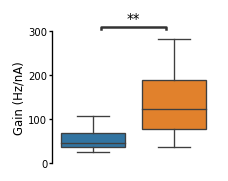

In [13]:
plt.figure()

plt.subplot(111)
plt.subplots_adjust(left=0.5, right=0.95, top=0.6, bottom=0.05)
ax = sns.boxplot(
    'cell_type', 
    'gain', 
    data=param_df.loc[param_df['is_monotonic'], :], 
    order=['5HT', 'GABA'], 
    palette=[colors['ser'], colors['som']]
)
plt.xlabel('')
add_stat_annotation(
    ax=ax,
    x='cell_type', 
    y='gain', 
    data=param_df.loc[param_df['is_monotonic'], :], 
    order=['5HT', 'GABA'], 
    box_pairs=[('5HT', 'GABA')],
    pvalue_thresholds=pvalue_thresholds,
    comparisons_correction='bonferroni',
    test='Mann-Whitney',
    loc='outside'
)
plt.yticks([0, 100, 200, 300])
plt.ylabel(r'Gain (Hz/nA)')
plt.xticks([])
pltools.hide_border('trb', trim=True)

if IMG_PATH is not None:
    savefig(os.path.join(IMG_PATH, 'gain_comparison'))

In [14]:
metric = 'gain'
stats.levene(
    param_df.loc[(param_df['cell_type'] == '5HT') & param_df['is_monotonic'], metric],
    param_df.loc[(param_df['cell_type'] == 'GABA') & param_df['is_monotonic'], metric], 
    center='median'
)

LeveneResult(statistic=13.255745588520066, pvalue=0.0014421769704643795)

## Rheobase

p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
o: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
5HT v.s. GABA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.528e-03 U_stat=1.930e+02


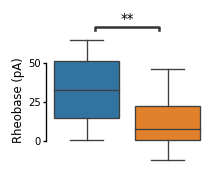

In [15]:
plt.figure()

plt.subplot(111)
plt.subplots_adjust(left=0.5, right=0.95, top=0.6, bottom=0.05)
ax = sns.boxplot(
    'cell_type', 
    'rheobase', 
    data=param_df, 
    order=['5HT', 'GABA'], 
    palette=[colors['ser'], colors['som']]
)
plt.xlabel('')
add_stat_annotation(
    ax=ax,
    x='cell_type', 
    y='rheobase', 
    data=param_df, 
    order=['5HT', 'GABA'], 
    box_pairs=[('5HT', 'GABA')],
    pvalue_thresholds=pvalue_thresholds,
    comparisons_correction='bonferroni',
    test='Mann-Whitney',
    loc='outside'
)
plt.ylabel(r'Rheobase (pA)')
plt.yticks([0, 25, 50])
plt.xticks([])
pltools.hide_border('trb', trim=True)

if IMG_PATH is not None:
    savefig(os.path.join(IMG_PATH, 'rheobase_comparison'))

In [16]:
metric = 'rheobase'
stats.levene(
    param_df.loc[param_df['cell_type'] == '5HT', metric],
    param_df.loc[param_df['cell_type'] == 'GABA', metric], 
    center='median'
)

LeveneResult(statistic=2.4537711078032363, pvalue=0.1280911193090033)

## Frequency at rheobase

p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
o: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
5HT v.s. GABA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.706e-02 U_stat=6.200e+01


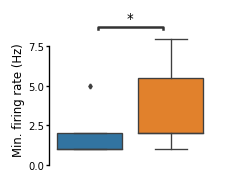

In [17]:
plt.figure()

plt.subplot(111)
plt.subplots_adjust(left=0.5, right=0.95, top=0.6, bottom=0.05)
ax = sns.boxplot(
    'cell_type', 
    'freq_at_rheobase', 
    data=param_df, 
    order=['5HT', 'GABA'], 
    palette=[colors['ser'], colors['som']],
    fliersize=fliersize
)
plt.xlabel('')
add_stat_annotation(
    ax=ax,
    x='cell_type', 
    y='freq_at_rheobase', 
    data=param_df, 
    order=['5HT', 'GABA'], 
    box_pairs=[('5HT', 'GABA')],
    pvalue_thresholds=pvalue_thresholds,
    comparisons_correction='bonferroni',
    test='Mann-Whitney',
    loc='outside'
)
plt.ylim(0, plt.ylim()[1])
plt.ylabel(r'Min. firing rate (Hz)')
plt.xticks([])
plt.yticks([0, 2.5, 5, 7.5])
pltools.hide_border('trb', trim=True)

if IMG_PATH is not None:
    savefig(os.path.join(IMG_PATH, 'frequency_at_rheobase_comparison'))

In [18]:
metric = 'freq_at_rheobase'
stats.levene(
    param_df.loc[param_df['cell_type'] == '5HT', metric],
    param_df.loc[param_df['cell_type'] == 'GABA', metric], 
    center='median'
)

LeveneResult(statistic=3.7996523180152875, pvalue=0.0609939287427635)

## Frequency at 50pA

Interpolated.

p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
o: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
5HT v.s. GABA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.214e-03 U_stat=4.150e+01


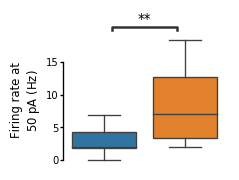

In [19]:
plt.figure()

plt.subplot(111)
plt.subplots_adjust(left=0.5, right=0.95, top=0.6, bottom=0.05)
ax = sns.boxplot(
    'cell_type', 
    'freq_at_50', 
    data=param_df, 
    order=['5HT', 'GABA'], 
    palette=[colors['ser'], colors['som']],
    fliersize=fliersize
)
plt.xlabel('')
add_stat_annotation(
    ax=ax,
    x='cell_type', 
    y='freq_at_50', 
    data=param_df, 
    order=['5HT', 'GABA'], 
    box_pairs=[('5HT', 'GABA')],
    pvalue_thresholds=pvalue_thresholds,
    comparisons_correction='bonferroni',
    test='Mann-Whitney',
    loc='outside'
)
plt.ylabel('Firing rate at\n$50$ pA (Hz)')
plt.xticks([])
pltools.hide_border('trb', trim=True)

if IMG_PATH is not None:
    savefig(os.path.join(IMG_PATH, 'frequency_at_50_comparison'))

In [20]:
metric = 'freq_at_50'
stats.levene(
    param_df.loc[param_df['cell_type'] == '5HT', metric],
    param_df.loc[param_df['cell_type'] == 'GABA', metric], 
    center='median'
)

LeveneResult(statistic=9.028800753189026, pvalue=0.005433750610301978)

## Spearman rho

p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
o: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
5HT v.s. GABA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.715e-01 U_stat=1.420e+02


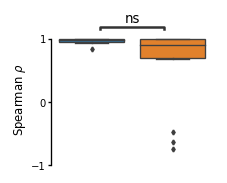

In [21]:
plt.figure()

plt.subplot(111)
plt.subplots_adjust(left=0.5, right=0.95, top=0.6, bottom=0.05)
ax = sns.boxplot(
    'cell_type', 
    'spearman_rho', 
    data=param_df, 
    order=['5HT', 'GABA'], 
    palette=[colors['ser'], colors['som']],
    fliersize=fliersize
)
plt.xlabel('')
add_stat_annotation(
    ax=ax,
    x='cell_type', 
    y='spearman_rho', 
    data=param_df, 
    order=['5HT', 'GABA'], 
    box_pairs=[('5HT', 'GABA')],
    pvalue_thresholds=pvalue_thresholds,
    comparisons_correction='bonferroni',
    test='Mann-Whitney',
    loc='outside'
)
plt.ylabel(r'Spearman $\rho$')
plt.yticks([-1, 0, 1])
plt.xticks([])
pltools.hide_border('trb', trim=True)

if IMG_PATH is not None:
    savefig(os.path.join(IMG_PATH, 'spearman_comparison'))

In [22]:
metric = 'spearman_rho'
stats.levene(
    param_df.loc[param_df['cell_type'] == '5HT', metric],
    param_df.loc[param_df['cell_type'] == 'GABA', metric], 
    center='median'
)

LeveneResult(statistic=6.32439837359216, pvalue=0.017706983706007196)

## Proportion of cells with monotonic $f/I$ curves

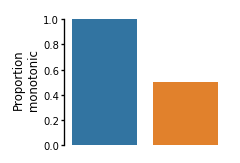

In [23]:
plt.figure()

plt.subplot(111)
plt.subplots_adjust(left=0.5, right=0.95, top=0.6, bottom=0.05)
sns.barplot(
    'cell_type', 
    'is_monotonic', 
    data=param_df, 
    order=['5HT', 'GABA'], 
    palette=[colors['ser'], colors['som']], 
    ci=None
)
plt.ylabel('Proportion\nmonotonic')
plt.xlabel('')
plt.xticks([])
pltools.hide_border('trb', trim=True)

if IMG_PATH is not None:
    savefig(os.path.join(IMG_PATH, 'monotonic_comparison'))